In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
%matplotlib inline

digits =  load_digits()

In [9]:
print("image data shape :",digits.data.shape)
print("Label data shape :",digits.target.shape)

image data shape : (1797, 64)
Label data shape : (1797,)


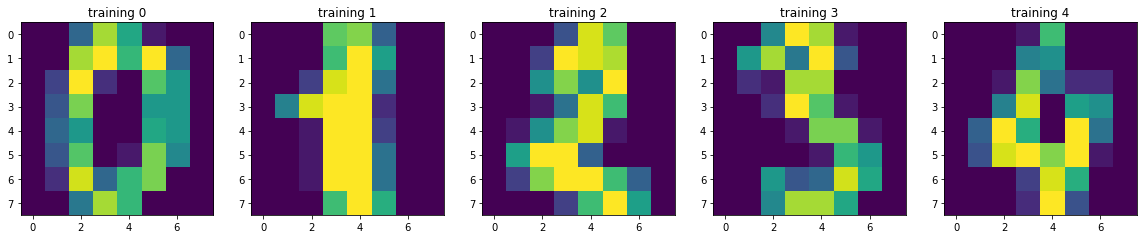

In [12]:
plt.figure(figsize=(20,4))
for index ,(image,label) in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)))
    plt.title("training {0}" .format(label))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=2)
print("x train :",x_train.shape)
print("y train :",y_train.shape)
print("x test :",x_test.shape)
print("y test :",y_test.shape)

x train : (1437, 64)
y train : (1437,)
x test : (360, 64)
y test : (360,)


In [23]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/home/calsoft/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/calsoft/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
print(logreg.predict(x_test))

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 1 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 8 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 1 4 8 7 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 7 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 9 7 4 8 9 5 7 6 9 0 0 4 0 0 9 0 6 5 8 8
 3 7 8 2 0 8 2 7 3 0 2 1 5 2 7 0 6 9 3 3 1 3 5 2 8 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 7 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 3 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 5 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5]


In [27]:
print(logreg.score(x_test,y_test))

0.9361111111111111


In [31]:
cm = metrics.confusion_matrix(y_test,logreg.predict(x_test))
print(metrics.confusion_matrix(y_test,logreg.predict(x_test)))

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  3  2  0]
 [ 0  2  0  0 31  0  0  0  1  1]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  1  0  1  0  1  3 22]]


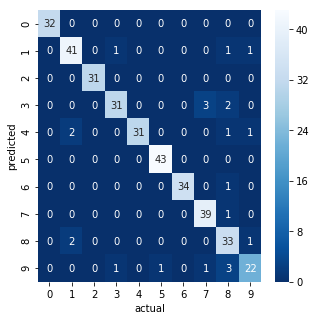

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,cmap='Blues_r',annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()